In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect
from numpy import random

Using CAMB 1.6.0 installed at /home/flapbat/anaconda3/envs/env_voigt/lib/python3.12/site-packages/camb


In [7]:
#Set up a new set of parameters for CAMB
#The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(H0=67.5, halofit_version='mead', lmax=3000)

In [8]:
#calculate results for these parameters
results = camb.get_results(pars)

In [9]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')

In [10]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']

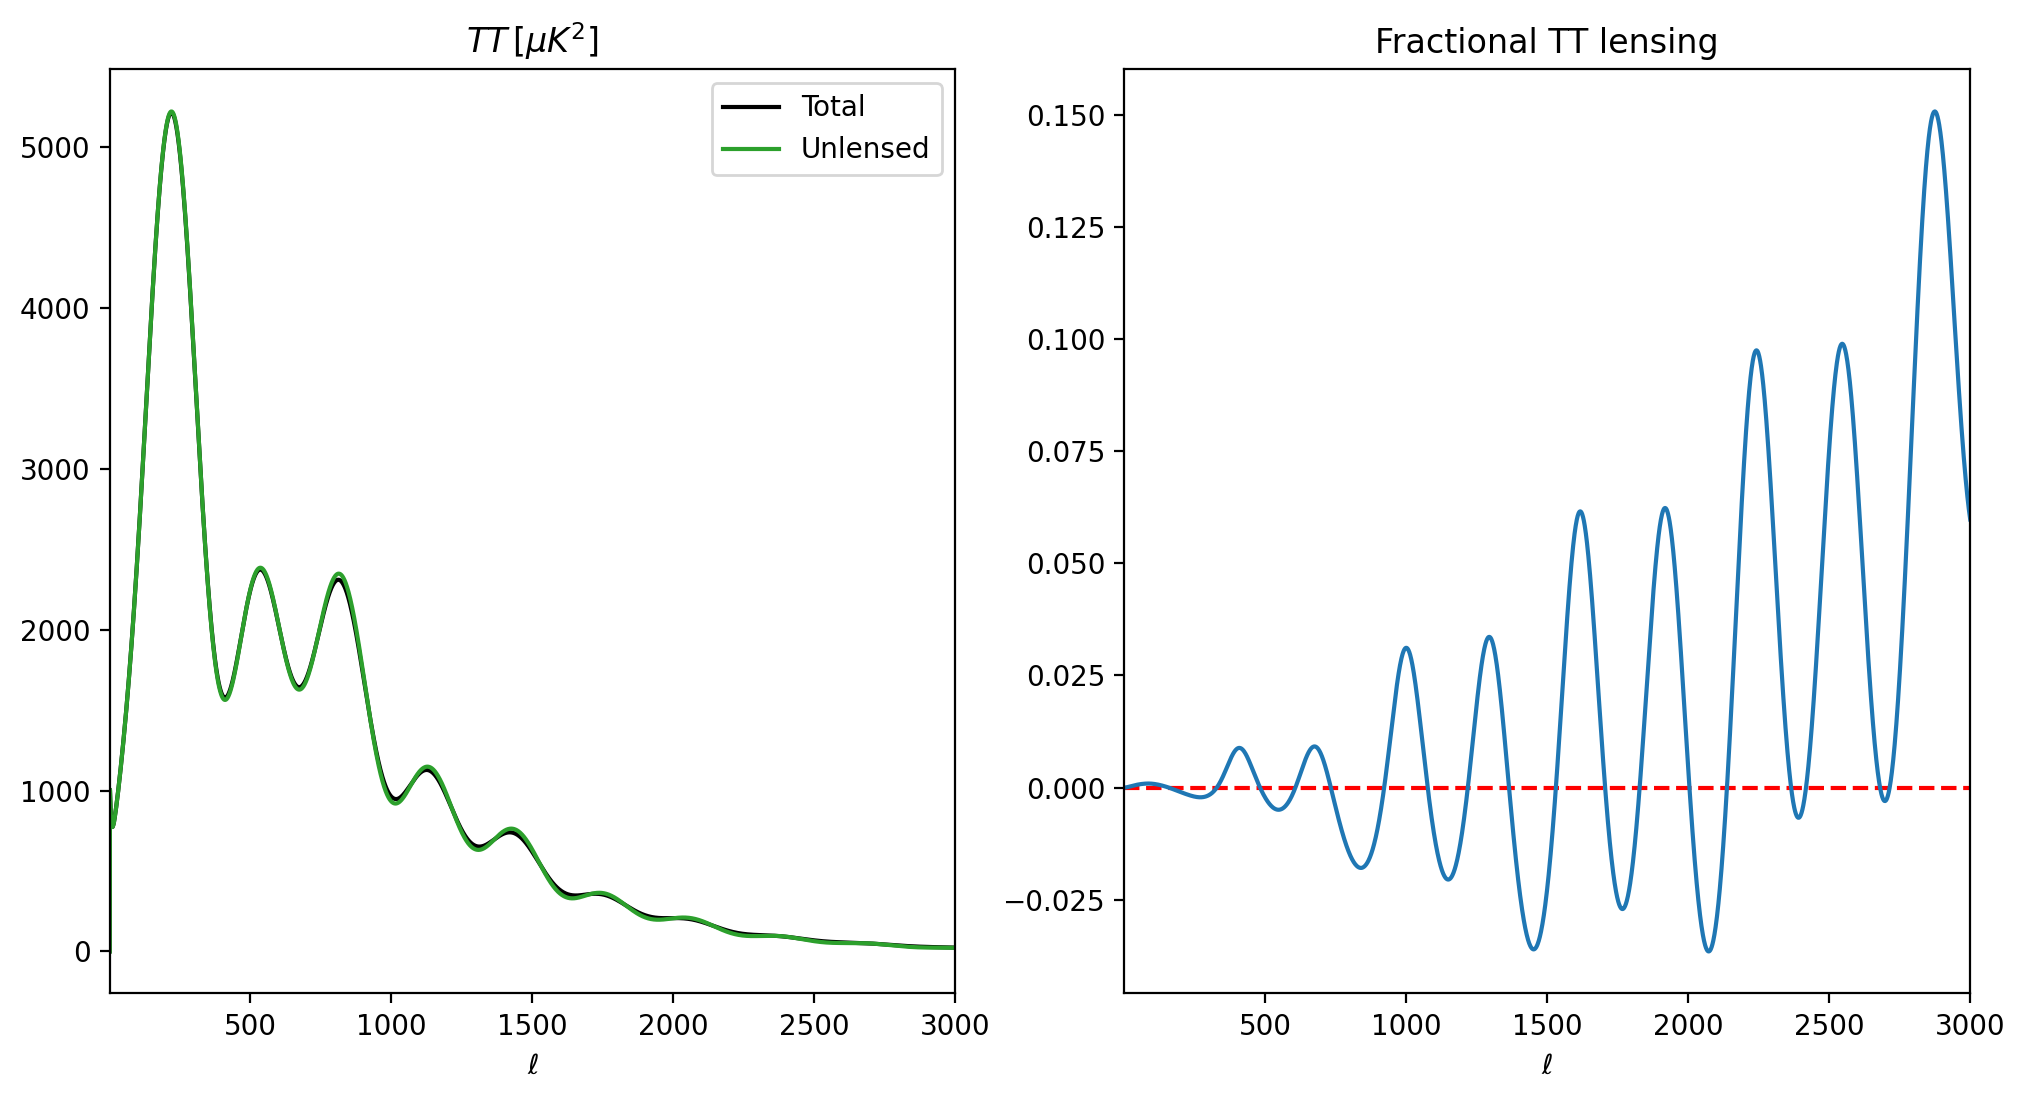

In [11]:
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(1,2, figsize = (12,6))
ax[0].plot(ls,totCL[:,0], color='k', label = "Total")
ax[0].plot(ls,unlensedCL[:,0], color='C2', label = "Unlensed")
ax[0].legend()
ax[0].set_title(r'$TT\, [\mu K^2]$')
ax[1].plot([2,3000],[0,0], color = "red", linestyle = "--")
ax[1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[1].set_title(r'Fractional TT lensing')
for ax in ax.reshape(-1): 
    ax.set_xlim([2,3000])
    ax.set_xlabel(r'$\ell$');
plt.show()